In [40]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
# preproceccing
rew_df = pd.read_csv("/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv") 
stop_words = stopwords.words('english')
filtered_text = []
for i in rew_df["Review"]:
    i = re.sub("\d", " ", i)
    i = re.sub('[%s]' % re.escape(string.punctuation), ' ', i)
    i = re.sub('\n', ' ', i)
    i = re.sub('\s{2,}', " ", i)
    text_tokens = word_tokenize(i)
    for w in text_tokens:
        if w not in stop_words:
            filtered_text.append(w)
# vizualization
def visualize(label):
    text = ''
    for msg in rew_df[rew_df['Rating'] == label]['Review']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

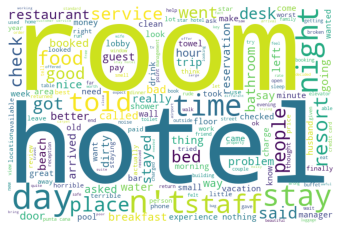

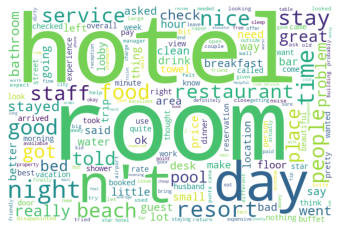

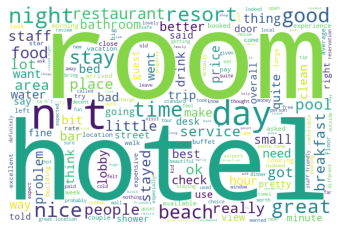

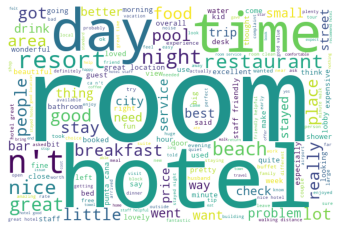

In [42]:
for i in range(1, 5):
    visualize(i)

In [44]:
# vectorization
X_train, X_test, y_train, y_test = train_test_split(rew_df['Review'], rew_df['Rating'], test_size=0.20)
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

# classification
clf = MultinomialNB(alpha=0.1)
clf.fit(tfidf_train, y_train)
y_pred = clf.predict(tfidf_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.44      0.53       292
           2       0.40      0.24      0.30       345
           3       0.21      0.04      0.06       446
           4       0.42      0.42      0.42      1195
           5       0.63      0.84      0.72      1821

    accuracy                           0.55      4099
   macro avg       0.47      0.39      0.41      4099
weighted avg       0.51      0.55      0.51      4099



In [45]:
print(confusion_matrix(y_test, y_pred))

[[ 128   74   12   47   31]
 [  44   83   35  127   56]
 [  10   36   17  236  147]
 [   3   14   13  496  669]
 [   2    3    4  281 1531]]
